## Bike Sales Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

### Loading the data

In [2]:
sales = pd.read_csv('data/sales_data.csv', parse_dates=['Date'])

#### The data at a glance

In [3]:
sales.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


In [4]:
sales.shape

(113036, 18)

In [5]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113036 entries, 0 to 113035
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Date              113036 non-null  datetime64[ns]
 1   Day               113036 non-null  int64         
 2   Month             113036 non-null  object        
 3   Year              113036 non-null  int64         
 4   Customer_Age      113036 non-null  int64         
 5   Age_Group         113036 non-null  object        
 6   Customer_Gender   113036 non-null  object        
 7   Country           113036 non-null  object        
 8   State             113036 non-null  object        
 9   Product_Category  113036 non-null  object        
 10  Sub_Category      113036 non-null  object        
 11  Product           113036 non-null  object        
 12  Order_Quantity    113036 non-null  int64         
 13  Unit_Cost         113036 non-null  int64         
 14  Unit

In [6]:
sales.describe()

,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
count,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000
mean,15.665753,2014.401739,35.919212,11.901660,267.296366,452.938427,285.051665,469.318695,754.370360
std,8.781567,1.272510,11.021936,9.561857,549.835483,922.071219,453.887443,884.866118,1309.094674
min,1.000000,2011.000000,17.000000,1.000000,1.000000,2.000000,-30.000000,1.000000,2.000000
25%,8.000000,2013.000000,28.000000,2.000000,2.000000,5.000000,29.000000,28.000000,63.000000
50%,16.000000,2014.000000,35.000000,10.000000,9.000000,24.000000,101.000000,108.000000,223.000000
75%,23.000000,2016.000000,43.000000,20.000000,42.000000,70.000000,358.000000,432.000000,800.000000
max,31.000000,2016.000000,87.000000,32.000000,2171.000000,3578.000000,15096.000000,42978.000000,58074.000000


### Numerical Analysis and Visualization
We'll analyse the `Unit_Cost` column

In [7]:
sales['Unit_Cost'].describe()

count    113036.000000
mean        267.296366
std         549.835483
min           1.000000
25%           2.000000
50%           9.000000
75%          42.000000
max        2171.000000
Name: Unit_Cost, dtype: float64

In [8]:
sales['Unit_Cost'].mean()

267.296365759581

In [9]:
sales['Unit_Cost'].median()

9.0

**Box and Whisker Plot**

<AxesSubplot:>

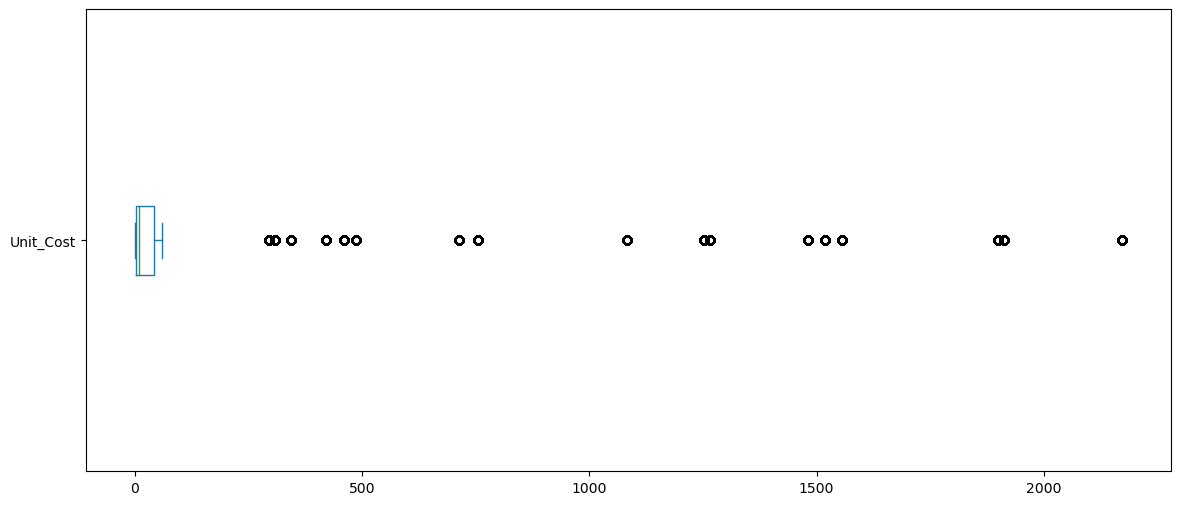

In [10]:
sales['Unit_Cost'].plot(kind='box', vert=False, figsize=(14,6))

**Kernel Density Estimate (KDE) Plot**

C:\Users\shubh\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


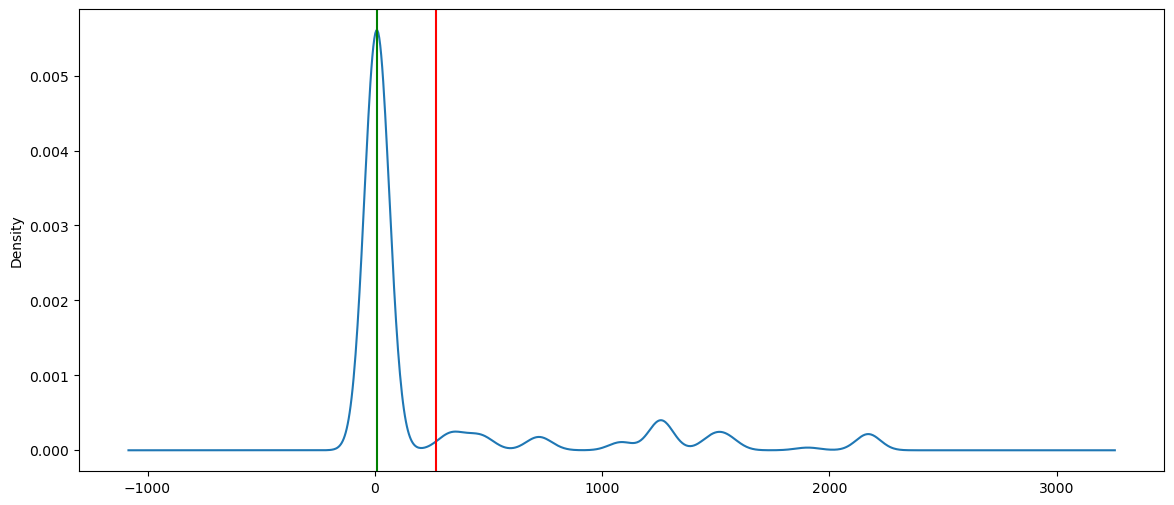

In [11]:
kde = sales['Unit_Cost'].plot(kind='density', figsize=(14,6))
kde.axvline(sales['Unit_Cost'].mean(), color='red')                      # 'Red' line showing the mean
kde.axvline(sales['Unit_Cost'].median(), color='green')                  # 'Green' line showing the median

Text(0, 0.5, 'Number of Sales')

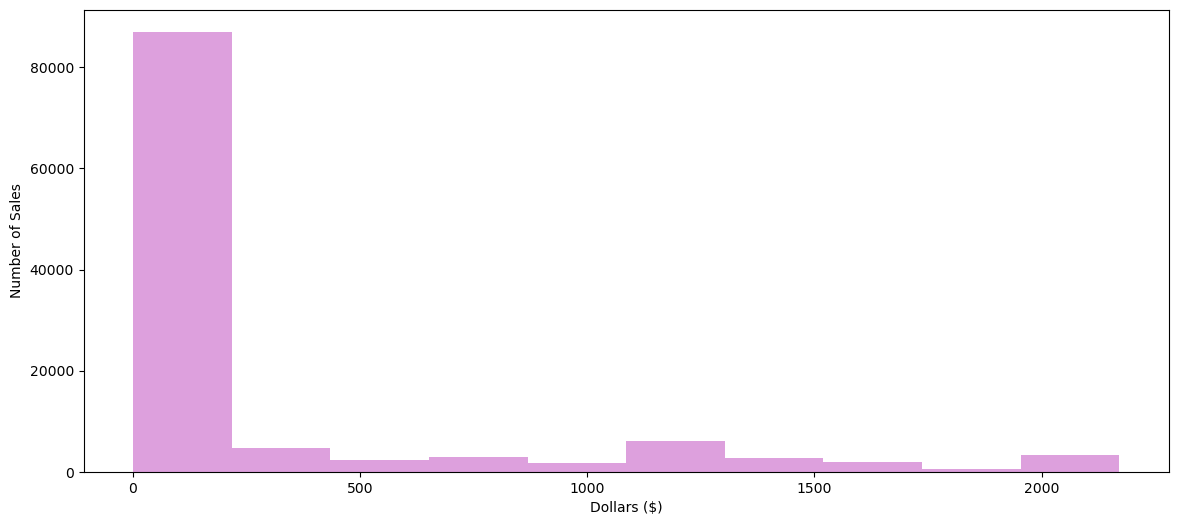

In [12]:
hist = sales['Unit_Cost'].plot(kind='hist', color='plum', figsize=(14,6))
hist.set_xlabel('Dollars ($)')
hist.set_ylabel('Number of Sales')

### Categorical Analysis and Visualization
We'll analyse the `Age_Group` column

In [13]:
sales.head(2)

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950


In [14]:
vc_age = sales['Age_Group'].value_counts()
vc_age

Adults (35-64)          55824
Young Adults (25-34)    38654
Youth (<25)             17828
Seniors (64+)             730
Name: Age_Group, dtype: int64

<AxesSubplot:ylabel='Age_Group'>

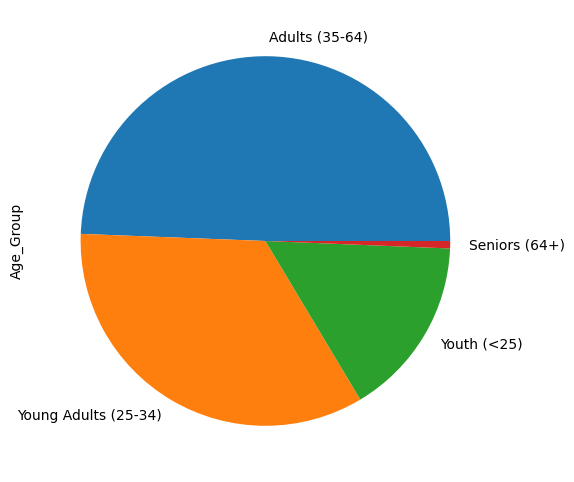

In [15]:
vc_age.plot(kind='pie', figsize=(6,6))

Text(0, 0.5, 'Number of Sales')

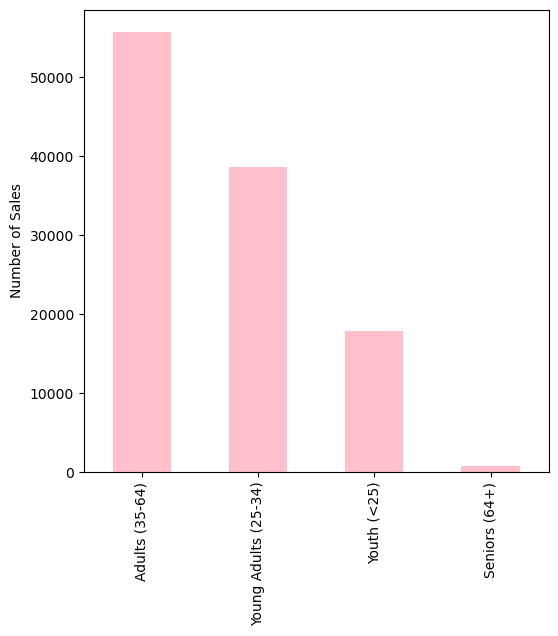

In [16]:
bar_age = vc_age.plot(kind='bar', color='pink', figsize=(6,6))
bar_age.set_ylabel('Number of Sales')

### Relationship between the columns?

In [17]:
corr= sales.corr()
corr

,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
Day,1.000000,-0.007635,-0.014296,-0.002412,0.003133,0.003207,0.004623,0.003329,0.003853
Year,-0.007635,1.000000,0.040994,0.123169,-0.217575,-0.213673,-0.181525,-0.215604,-0.208673
Customer_Age,-0.014296,0.040994,1.000000,0.026887,-0.021374,-0.020262,0.004319,-0.016013,-0.009326
Order_Quantity,-0.002412,0.123169,0.026887,1.000000,-0.515835,-0.515925,-0.238863,-0.340382,-0.312895
Unit_Cost,0.003133,-0.217575,-0.021374,-0.515835,1.000000,0.997894,0.741020,0.829869,0.817865
Unit_Price,0.003207,-0.213673,-0.020262,-0.515925,0.997894,1.000000,0.749870,0.826301,0.818522
Profit,0.004623,-0.181525,0.004319,-0.238863,0.741020,0.749870,1.000000,0.902233,0.956572
Cost,0.003329,-0.215604,-0.016013,-0.340382,0.829869,0.826301,0.902233,1.000000,0.988758
Revenue,0.003853,-0.208673,-0.009326,-0.312895,0.817865,0.818522,0.956572,0.988758,1.000000


([<matplotlib.axis.YTick at 0x2775bc85fd0>,
 [Text(0, 0, 'Day'),
  Text(0, 1, 'Year'),
  Text(0, 2, 'Customer_Age'),
  Text(0, 3, 'Order_Quantity'),
  Text(0, 4, 'Unit_Cost'),
  Text(0, 5, 'Unit_Price'),
  Text(0, 6, 'Profit'),
  Text(0, 7, 'Cost'),
  Text(0, 8, 'Revenue')])

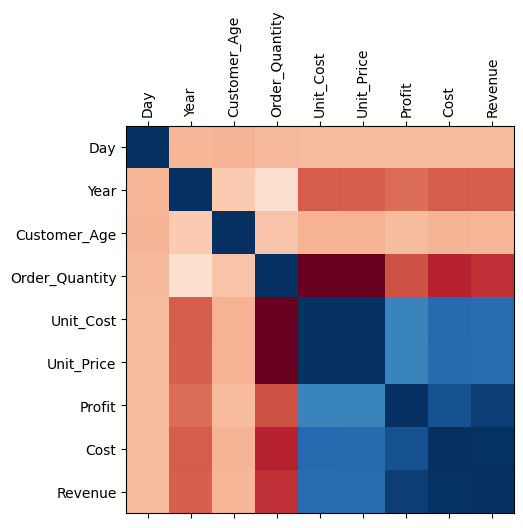

In [18]:
corr_mat = plt.figure(figsize=(5,5))
plt.matshow(corr, cmap='RdBu',fignum=corr_mat.number)
plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical')
plt.yticks(range(len(corr.columns)), corr.columns)

<AxesSubplot:xlabel='Customer_Age', ylabel='Profit'>

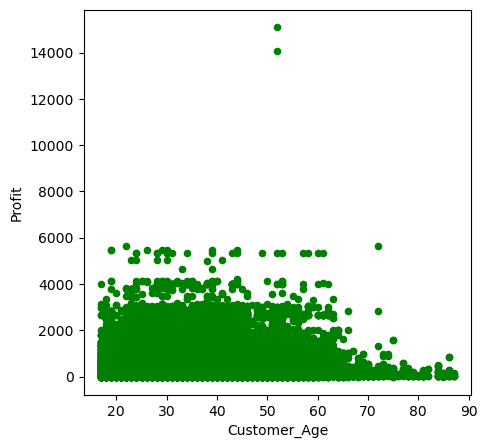

In [19]:
sales.plot(kind='scatter',x='Customer_Age',y='Profit',color='Green',figsize=(5,5))

<AxesSubplot:xlabel='Revenue', ylabel='Profit'>

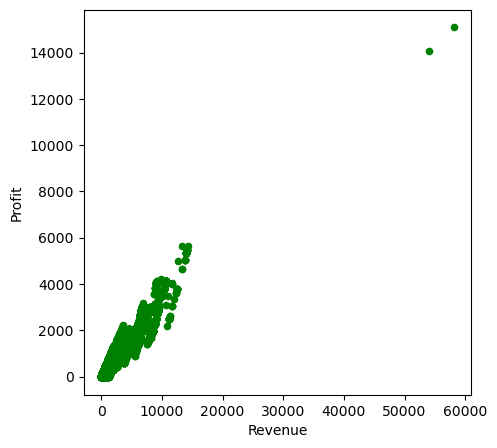

In [20]:
sales.plot(kind='scatter',x='Revenue',y='Profit',color='Green',figsize=(5,5))

Text(0, 0.5, 'Profit')

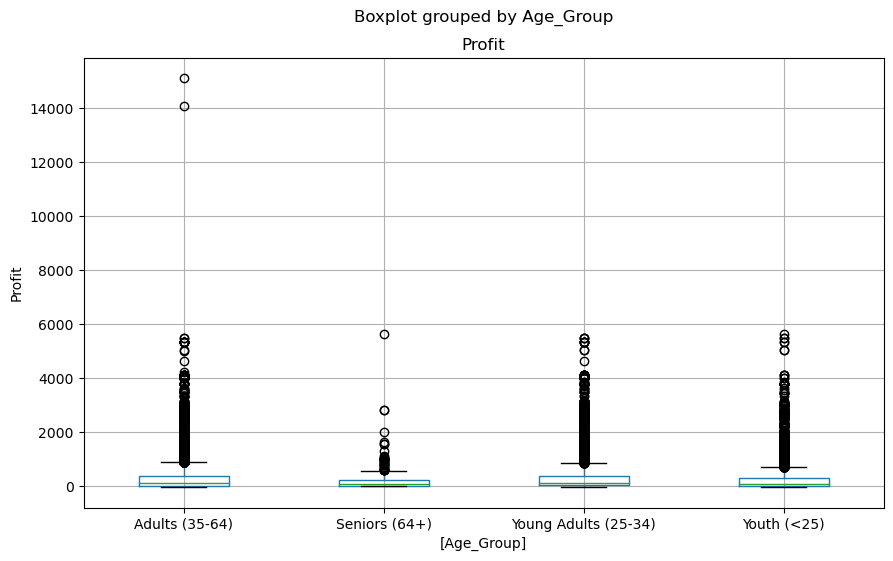

In [21]:
age_box = sales[['Profit', 'Age_Group']].boxplot(by='Age_Group', figsize=(10,6))
age_box.set_ylabel('Profit')

Year                 AxesSubplot(0.125,0.53;0.227941x0.35)
Customer_Age      AxesSubplot(0.398529,0.53;0.227941x0.35)
Order_Quantity    AxesSubplot(0.672059,0.53;0.227941x0.35)
Unit_Cost            AxesSubplot(0.125,0.11;0.227941x0.35)
Unit_Price        AxesSubplot(0.398529,0.11;0.227941x0.35)
Profit            AxesSubplot(0.672059,0.11;0.227941x0.35)
dtype: object

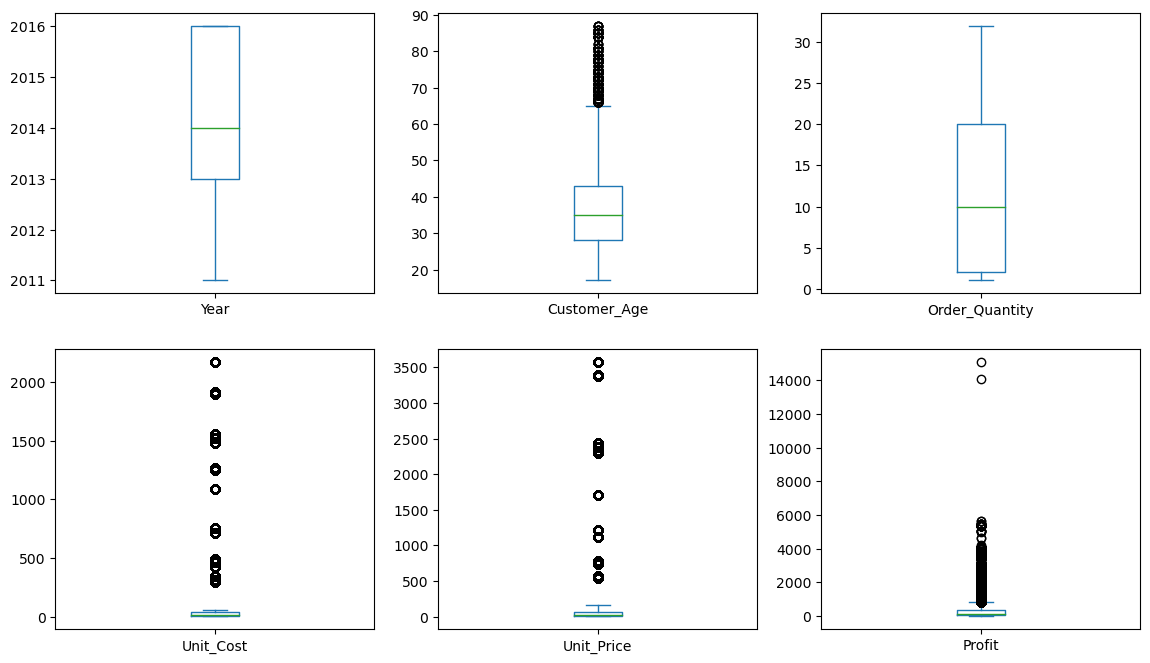

In [22]:
boxplot_cols = ['Year', 'Customer_Age', 'Order_Quantity', 'Unit_Cost', 'Unit_Price', 'Profit']

sales[boxplot_cols].plot(kind='box', subplots=True, layout=(2,3), figsize=(14,8))

### Column Wrangling
We can create new columns or modify existing ones

**Add and calculate a `Revenue_per_Age` column**

In [23]:
sales['Revenue_per_Age'] = sales['Revenue']/sales['Customer_Age']

sales['Revenue_per_Age'].head()

0    50.000000
1    50.000000
2    49.000000
3    42.612245
4     8.893617
Name: Revenue_per_Age, dtype: float64

<AxesSubplot:ylabel='Density'>

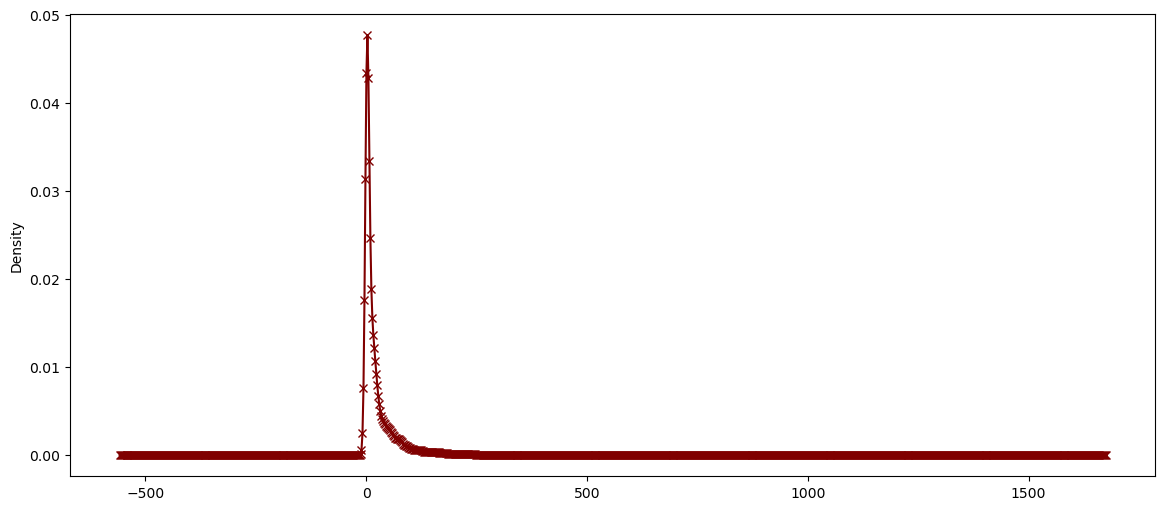

In [24]:
sales['Revenue_per_Age'].plot(kind='density', color='Maroon',style='x-',figsize=(14,6))

<AxesSubplot:ylabel='Frequency'>

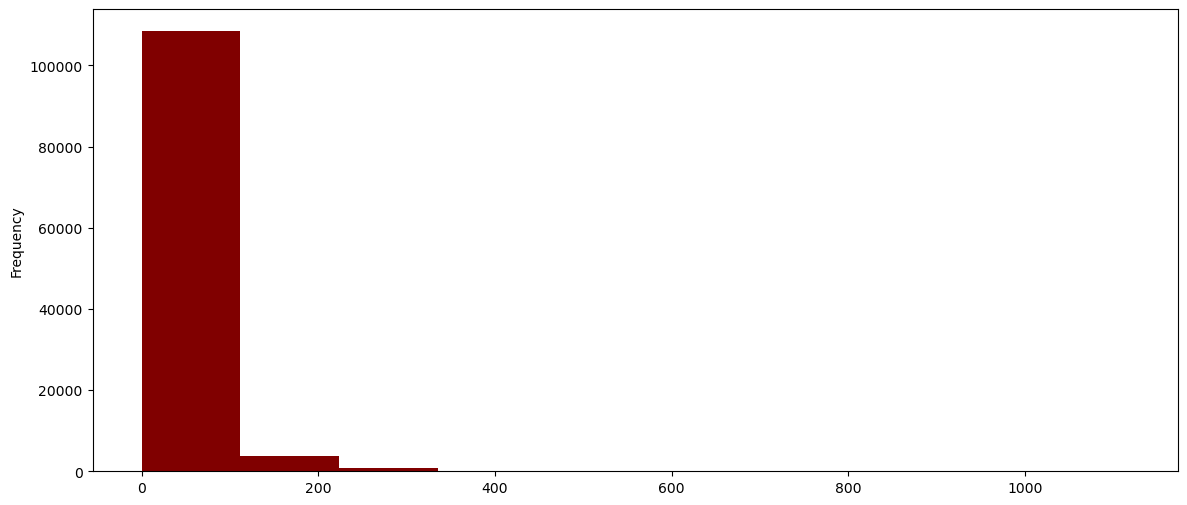

In [25]:
sales['Revenue_per_Age'].plot(kind='hist', color='Maroon',figsize=(14,6))

**Add and calculate a `Calculated_Cost` column**

In [26]:
sales['Calculated_Cost'] = sales['Order_Quantity'] * sales['Unit_Cost']

sales[['Calculated_Cost','Cost']].head()

,Calculated_Cost,Cost
0,360,360
1,360,360
2,1035,1035
3,900,900
4,180,180


In [27]:
(sales['Calculated_Cost'] != sales['Cost']).sum()

0

Scatter plot between `Cost` and `Profit`

<AxesSubplot:xlabel='Calculated_Cost', ylabel='Profit'>

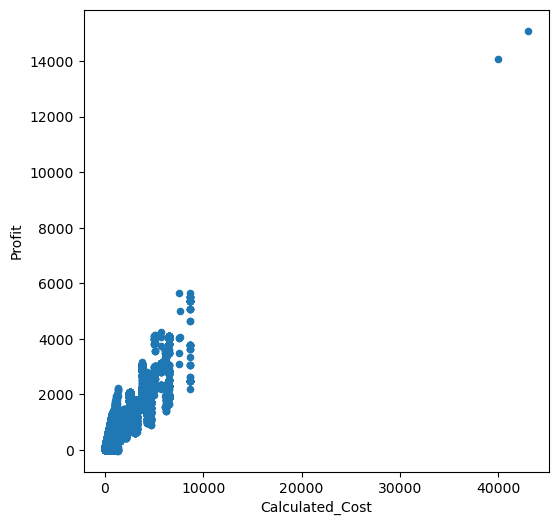

In [28]:
sales.plot(kind='scatter', x='Calculated_Cost',y='Profit',figsize=(6,6))

**Add and calculate a `Calculated_Revenue` column**

In [29]:
sales['Calculated_Revenue'] = sales['Cost'] + sales['Profit']

sales[['Calculated_Revenue','Revenue']].head()

,Calculated_Revenue,Revenue
0,950,950
1,950,950
2,2401,2401
3,2088,2088
4,418,418


In [30]:
(sales['Calculated_Revenue'] != sales['Revenue']).sum()

0

<AxesSubplot:ylabel='Frequency'>

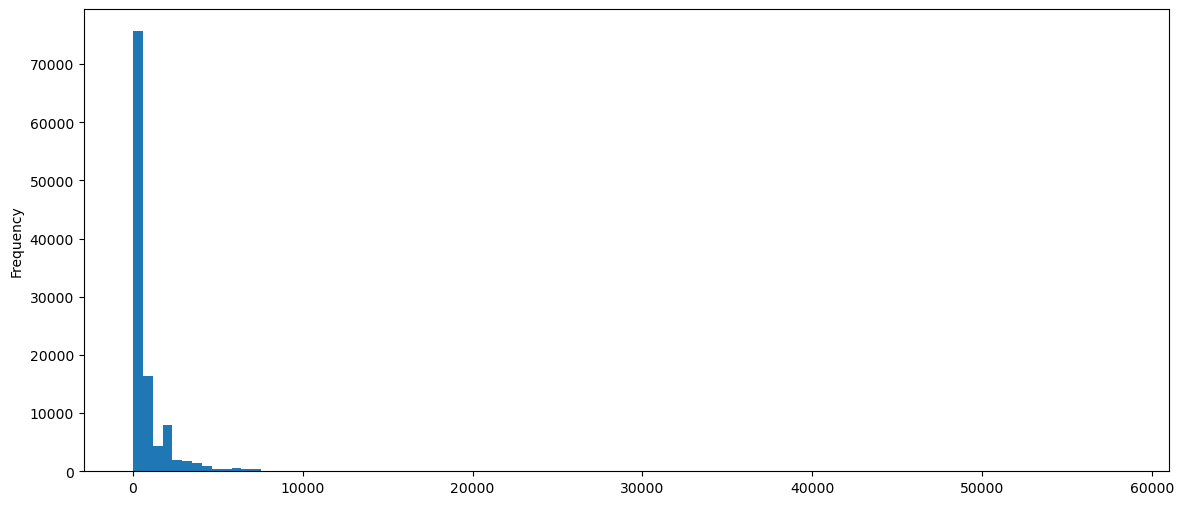

In [31]:
sales['Revenue'].plot(kind='hist', bins=100, figsize=(14,6))

**Modify all `Unit_Price` by adding 3% tax to them**

In [32]:
sales['Unit_Price'].head()

0    120
1    120
2    120
3    120
4    120
Name: Unit_Price, dtype: int64

In [33]:
#sales['Unit_Price'] = sales['Unit_Price'] * 1.03

sales['Unit_Price'] *= 1.03

sales['Unit_Price'].head()

0    123.6
1    123.6
2    123.6
3    123.6
4    123.6
Name: Unit_Price, dtype: float64

### Selection and Indexing

**Get all the sales made in state of `Kentucky`**

In [34]:
sales.loc[sales['State'] == 'Kentucky']

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,...,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Revenue_per_Age,Calculated_Cost,Calculated_Revenue
156,2013-11-04,4,November,2013,40,Adults (35-64),M,United States,Kentucky,Accessories,...,Hitch Rack - 4-Bike,1,45,123.60,63,45,108,2.700,45,108
157,2015-11-04,4,November,2015,40,Adults (35-64),M,United States,Kentucky,Accessories,...,Hitch Rack - 4-Bike,1,45,123.60,63,45,108,2.700,45,108
23826,2014-04-16,16,April,2014,40,Adults (35-64),M,United States,Kentucky,Accessories,...,Fender Set - Mountain,12,8,22.66,142,96,238,5.950,96,238
23827,2016-04-16,16,April,2016,40,Adults (35-64),M,United States,Kentucky,Accessories,...,Fender Set - Mountain,14,8,22.66,165,112,277,6.925,112,277
31446,2014-04-16,16,April,2014,40,Adults (35-64),M,United States,Kentucky,Accessories,...,"Sport-100 Helmet, Blue",29,13,36.05,537,377,914,22.850,377,914
31447,2016-04-16,16,April,2016,40,Adults (35-64),M,United States,Kentucky,Accessories,...,"Sport-100 Helmet, Blue",31,13,36.05,574,403,977,24.425,403,977
79670,2014-04-16,16,April,2014,40,Adults (35-64),M,United States,Kentucky,Accessories,...,ML Mountain Tire,2,11,30.90,32,22,54,1.350,22,54
79671,2014-04-16,16,April,2014,40,Adults (35-64),M,United States,Kentucky,Accessories,...,ML Mountain Tire,21,11,30.90,336,231,567,14.175,231,567
79672,2016-04-16,16,April,2016,40,Adults (35-64),M,United States,Kentucky,Accessories,...,ML Mountain Tire,1,11,30.90,16,11,27,0.675,11,27
79673,2016-04-16,16,April,2016,40,Adults (35-64),M,United States,Kentucky,Accessories,...,ML Mountain Tire,18,11,30.90,288,198,486,12.150,198,486


In [35]:
sales.loc[sales['Age_Group'] == 'Adults (35-64)', 'Revenue'].mean()

762.8287654055604

**How many records belong to Age Group `Youth (<25)` or `Adults (35-64)` ?**

In [36]:
sales.loc[(sales['Age_Group'] == 'Youth (<25)') | (sales['Age_Group'] == 'Adults (35-64)')].shape[0]

73652

**Get the mean revenue of the sales group `Adult (35-64)` in `United States`**

In [37]:
sales.loc[(sales['Age_Group'] == 'Adults (35-64)') & (sales['Country'] == 'United States'), 'Revenue'].mean()

726.7260473588342

**Increase the revenue by 10% to every sale made in `France`**

In [38]:
sales.loc[sales['Country'] == 'France', 'Revenue'] *= 1.1

In [39]:
sales.loc[sales['Country'] == 'France', 'Revenue'].head(10)

50      865.7
51      865.7
52     3252.7
53     3136.1
60      688.6
61      344.3
130     459.8
131     344.3
140     587.4
141     822.8
Name: Revenue, dtype: float64

## The Sakila Database

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3

%matplotlib inline

### Loading the data from the dataset

In [41]:
conn = sqlite3.connect(r"C:\Users\shubh\OneDrive\Desktop\Machine Learning\freeCodeCamp\Data Analysis with Python\data\sakila.db")

df = pd.read_sql('''
    SELECT
        rental.rental_id, rental.rental_date, rental.return_date,
        customer.last_name AS customer_lastname,
        store.store_id,
        city.city AS rental_store_city,
        film.title AS film_title, film.rental_duration AS film_rental_duration,
        film.rental_rate AS film_rental_rate, film.replacement_cost AS film_replacement_cost,
        film.rating AS film_rating
    FROM rental
    INNER JOIN customer ON rental.customer_id == customer.customer_id
    INNER JOIN inventory ON rental.inventory_id == inventory.inventory_id
    INNER JOIN store ON inventory.store_id == store.store_id
    INNER JOIN address ON store.address_id == address.address_id
    INNER JOIN city ON address.city_id == city.city_id
    INNER JOIN film ON inventory.film_id == film.film_id
    ;
''', conn, index_col='rental_id', parse_dates=['rental_date', 'return_date'])

### The data at a glance

In [42]:
df.head()

,rental_date,return_date,customer_lastname,store_id,rental_store_city,film_title,film_rental_duration,film_rental_rate,film_replacement_cost,film_rating
rental_id,,,,,,,,,,
1,2005-05-24 22:53:30,2005-05-26 22:04:30,HUNTER,1,Lethbridge,BLANKET BEVERLY,7,2.99,21.99,G
2,2005-05-24 22:54:33,2005-05-28 19:40:33,COLLAZO,2,Woodridge,FREAKY POCUS,7,2.99,16.99,R
3,2005-05-24 23:03:39,2005-06-01 22:12:39,MURRELL,2,Woodridge,GRADUATE LORD,7,2.99,14.99,G
4,2005-05-24 23:04:41,2005-06-03 01:43:41,PURDY,1,Lethbridge,LOVE SUICIDES,6,0.99,21.99,R
5,2005-05-24 23:05:21,2005-06-02 04:33:21,HANSEN,2,Woodridge,IDOLS SNATCHERS,5,2.99,29.99,NC-17


In [43]:
df.shape

(16044, 10)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16044 entries, 1 to 16049
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   rental_date            16044 non-null  datetime64[ns]
 1   return_date            15861 non-null  datetime64[ns]
 2   customer_lastname      16044 non-null  object        
 3   store_id               16044 non-null  int64         
 4   rental_store_city      16044 non-null  object        
 5   film_title             16044 non-null  object        
 6   film_rental_duration   16044 non-null  int64         
 7   film_rental_rate       16044 non-null  float64       
 8   film_replacement_cost  16044 non-null  float64       
 9   film_rating            16044 non-null  object        
dtypes: datetime64[ns](2), float64(2), int64(2), object(4)
memory usage: 1.3+ MB


In [45]:
df.describe()

,store_id,film_rental_duration,film_rental_rate,film_replacement_cost
count,16044.000000,16044.00000,16044.000000,16044.000000
mean,1.506171,4.93549,2.942630,20.215443
std,0.499978,1.40169,1.649678,6.081771
min,1.000000,3.00000,0.990000,9.990000
25%,1.000000,4.00000,0.990000,14.990000
50%,2.000000,5.00000,2.990000,20.990000
75%,2.000000,6.00000,4.990000,25.990000
max,2.000000,7.00000,4.990000,29.990000


### Numerical Analysis and Visualization

**We'll analyse the `film_rental_rate` column**

In [46]:
df['film_rental_rate'].describe()

count    16044.000000
mean         2.942630
std          1.649678
min          0.990000
25%          0.990000
50%          2.990000
75%          4.990000
max          4.990000
Name: film_rental_rate, dtype: float64

In [47]:
df['film_rental_rate'].mean()

2.9426302667662574

In [48]:
df['film_rental_rate'].median()

2.99

<AxesSubplot:>

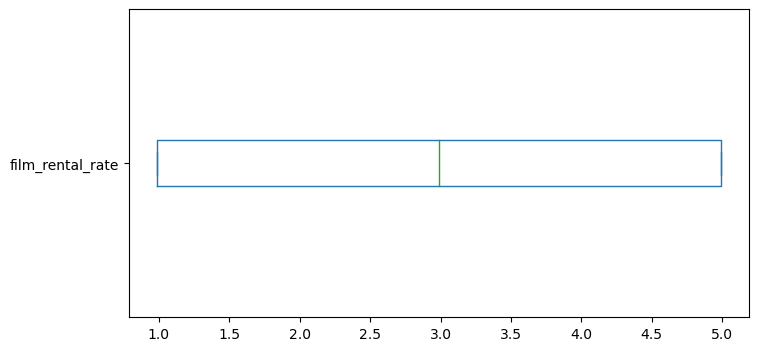

In [49]:
df['film_rental_rate'].plot(kind='box', vert=False, figsize=(8,4))

<AxesSubplot:ylabel='Density'>

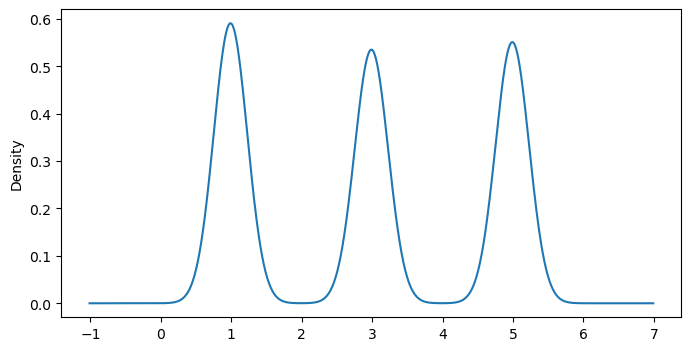

In [50]:
df['film_rental_rate'].plot(kind='kde', figsize=(8,4))

Text(0, 0.5, 'Number of Rentals')

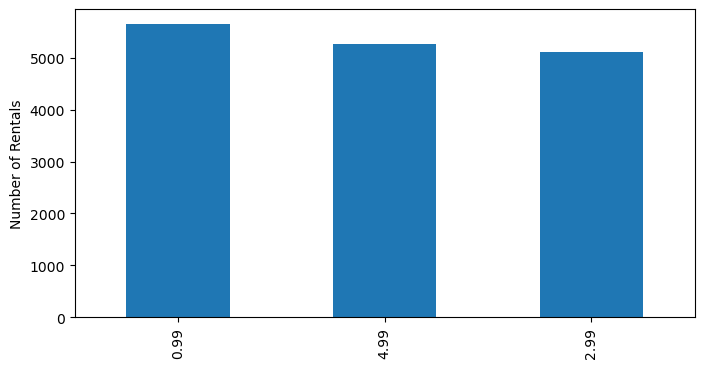

In [51]:
film_rent_rate = df['film_rental_rate'].value_counts().plot(kind='bar', figsize=(8,4))

film_rent_rate.set_ylabel('Number of Rentals')

### Categorical Analysis and Visualization

**We'll analyze the `rental_store_city` column**

In [52]:
df['rental_store_city'].value_counts()

Woodridge     8121
Lethbridge    7923
Name: rental_store_city, dtype: int64

<AxesSubplot:ylabel='rental_store_city'>

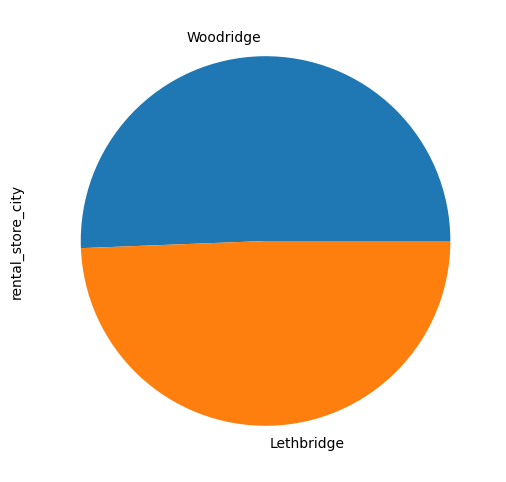

In [53]:
df['rental_store_city'].value_counts().plot(kind='pie', figsize=(6,6))

Text(0, 0.5, 'Number of Rentals')

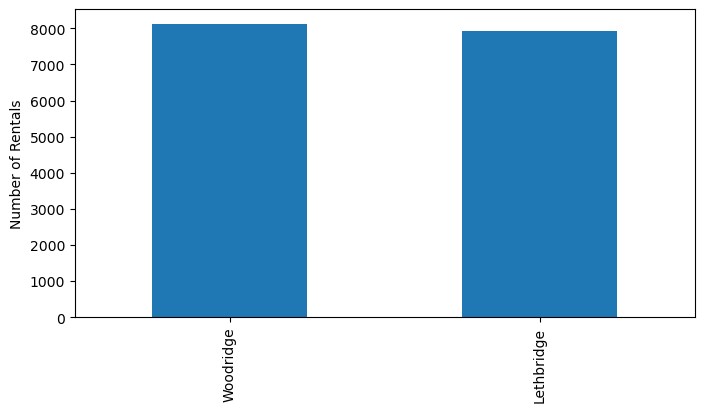

In [54]:
rent_store_city = df['rental_store_city'].value_counts().plot(kind='bar', figsize=(8,4))
rent_store_city.set_ylabel('Number of Rentals')

### Column Wrangling
We can also create new columns or modify existing ones.

Add and calculate a new `rental_gain_return` column

In [55]:
df['rental_gain_return'] = df['film_rental_rate'] / df['film_replacement_cost'] * 100
df['rental_gain_return'].head()

rental_id
1    13.597090
2    17.598587
3    19.946631
4     4.502046
5     9.969990
Name: rental_gain_return, dtype: float64

<AxesSubplot:ylabel='Density'>

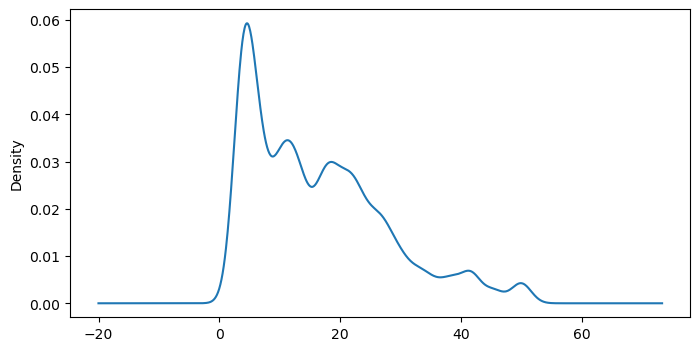

In [56]:
df['rental_gain_return'].plot(kind='density', figsize=(8,4))

In [57]:
round(df['rental_gain_return'].mean() ,2)

16.34

In [58]:
round(df['rental_gain_return'].median() ,2)

13.6

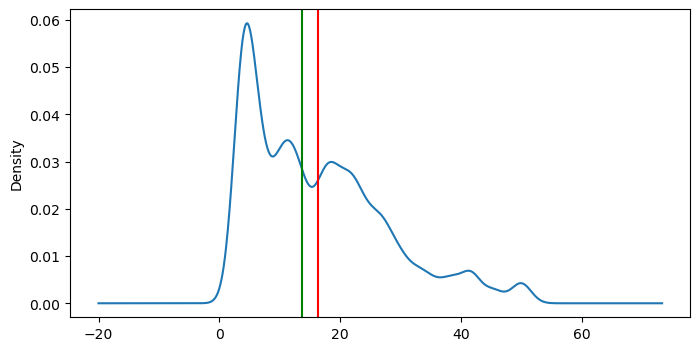

In [59]:
ret = df['rental_gain_return'].plot(kind='density', figsize=(8,4))
ret.axvline(df['rental_gain_return'].mean(),color='red')
ret.axvline(df['rental_gain_return'].median(),color='green')

### Selection and Indexing

**Get the rental records of the customer with lastname `HANSEN`**

In [60]:
df.loc[df['customer_lastname'] == 'HANSEN']

,rental_date,return_date,customer_lastname,store_id,rental_store_city,film_title,film_rental_duration,film_rental_rate,film_replacement_cost,film_rating,rental_gain_return
rental_id,,,,,,,,,,,
5,2005-05-24 23:05:21,2005-06-02 04:33:21,HANSEN,2,Woodridge,IDOLS SNATCHERS,5,2.99,29.99,NC-17,9.969990
134,2005-05-25 21:48:41,2005-06-02 18:28:41,HANSEN,2,Woodridge,JUMPING WRATH,4,0.99,18.99,NC-17,5.213270
416,2005-05-27 15:02:10,2005-05-29 10:34:10,HANSEN,2,Woodridge,LESSON CLEOPATRA,3,0.99,28.99,NC-17,3.414971
809,2005-05-29 19:10:20,2005-06-05 19:05:20,HANSEN,2,Woodridge,INDIAN LOVE,4,0.99,26.99,NC-17,3.668025
1006,2005-05-31 00:57:08,2005-06-02 22:35:08,HANSEN,2,Woodridge,SALUTE APOLLO,4,2.99,29.99,R,9.969990
1368,2005-06-15 14:27:47,2005-06-23 18:07:47,HANSEN,1,Lethbridge,HUNCHBACK IMPOSSIBLE,4,4.99,28.99,PG-13,17.212832
2603,2005-06-19 06:21:25,2005-06-26 03:19:25,HANSEN,2,Woodridge,CAT CONEHEADS,5,4.99,14.99,G,33.288859
5209,2005-07-09 11:22:39,2005-07-17 09:31:39,HANSEN,1,Lethbridge,WHALE BIKINI,4,4.99,11.99,PG-13,41.618015
5266,2005-07-09 14:17:40,2005-07-16 10:42:40,HANSEN,2,Woodridge,LOATHING LEGALLY,4,0.99,29.99,R,3.301100


**Create a list of all the films with the highest replacement cost**

In [61]:
print(df.loc[df['film_replacement_cost'] == df['film_replacement_cost'].max(), 'film_title'].unique())

['IDOLS SNATCHERS' 'LAWLESS VISION' 'SONG HEDWIG' 'LOATHING LEGALLY'
 'PATIENT SISTER' 'RESERVOIR ADAPTATION' 'JEEPERS WEDDING'
 'GOLDFINGER SENSIBILITY' 'CHARIOTS CONSPIRACY' 'HONEY TIES'
 'GRAFFITI LOVE' 'SLACKER LIAISONS' 'DIRTY ACE' 'BLINDNESS GUN'
 'WYOMING STORM' 'FEUD FROGMEN' 'SALUTE APOLLO' 'JINGLE SAGEBRUSH'
 'HILLS NEIGHBORS' 'UNCUT SUICIDES' 'EVERYONE CRAFT' 'FLATLINERS KILLER'
 'BALLROOM MOCKINGBIRD' 'RIVER OUTLAW' 'ARABIA DOGMA' 'VIRGIN DAISY'
 'JERICHO MULAN' 'SASSY PACKER' 'TRACY CIDER' 'LOVER TRUMAN'
 'DOCTOR GRAIL' 'GILMORE BOILED' 'PRINCESS GIANT' 'CRUELTY UNFORGIVEN'
 'REIGN GENTLEMEN' 'WEST LION' 'BONNIE HOLOCAUST' 'EARTH VISION'
 'RANDOM GO' 'CLOCKWORK PARADISE' 'FANTASIA PARK' 'RIGHT CRANES'
 'CUPBOARD SINNERS' 'OSCAR GOLD' 'SMILE EARRING' 'HOLLYWOOD ANONYMOUS'
 'POSEIDON FOREVER' 'EXTRAORDINARY CONQUERER' 'QUEST MUSSOLINI'
 'JAPANESE RUN' 'CLYDE THEORY' 'DESPERATE TRAINSPOTTING']


**How many `PG` or `PG-13` films were rented?**

In [62]:
df.loc[(df['film_rating'] == 'PG') | (df['film_rating'] == 'PG-13')].shape[0]

6797